In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ck4ucst7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ck4ucst7
  Resolved https://github.com/facebookresearch/detectron2.git to commit 67ac149947124670f6678e1bdd75f89dbf0dd5e7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=7803781 sha256=be731dac2ebedca6ca6d635b6c0085b

In [ ]:
import torch, torchvision
print(torch.cuda.is_available())
import os, pickle ,random
import cv2 as cv
import matplotlib.pyplot as plt

True


In [ ]:
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode

In [ ]:
config_file_path = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
output_dir = "./object_detection"
num_classes = 1
device = "cuda"

In [ ]:
train_dataset_name = "cumbaru_train2"
train_images_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train"
train_json_annot_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/train.json"
val_dataset_name = "cumbaru_val2"
val_images_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val"
val_json_annot_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/val.json"

In [ ]:
register_coco_instances(name = train_dataset_name, metadata = {},
                       json_file = train_json_annot_path,
                        image_root = train_images_path)

In [ ]:
register_coco_instances(name = val_dataset_name, metadata = {},
                       json_file = val_json_annot_path,
                        image_root = val_images_path)

In [ ]:
cfg_save_path = "IS_cfg.pickle"

In [ ]:
def plot_samples(dataset_name, n = 1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

    for s in random.sample(dataset_custom, n):
        img = cv.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize = (5,10))
        plt.imshow(v.get_image())
        plt.show()

In [ ]:
def plot_samples(dataset_name, n = 1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

    for s in random.sample(dataset_custom, n):
        print(s["file_name"])
        img = cv.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize = (5,10))
        plt.imshow(v.get_image())
        plt.show()

[07/04 12:58:48 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/train.json takes 5.05 seconds.
[07/04 12:58:48 d2.data.datasets.coco]: Loaded 313 images in COCO format from /content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/train.json
/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/22_09_18_DJI_0100.JPG


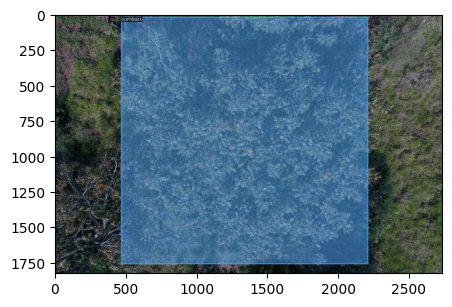

In [ ]:
#Verifying
plot_samples(dataset_name = train_dataset_name, n = 1)

In [ ]:
def get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir):
    cfg = get_cfg()

    cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
    cfg.DATASETS.TRAIN = (train_dataset_name,)
    cfg.DATASETS.TEST = (val_dataset_name,)

    cfg.DATALOADER.NUM_WORKERS = 2

    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 1000
    cfg.SOLVER.STEPS = []

    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    cfg.MODEL.DEVICE = device
    cfg.OUTPUT_DIR = output_dir

    return cfg

In [ ]:
def main():
    cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir)

    with open(cfg_save_path,"wb") as f:
        pickle.dump(cfg, f, protocol = pickle.HIGHEST_PROTOCOL)

    os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)

    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume = False)

    trainer.train()

In [ ]:
main()

[07/04 12:59:03 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:01, 111MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[07/04 12:59:05 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/04 13:00:16 d2.utils.events]:  eta: 0:45:01  iter: 19  total_loss: 0.8032  loss_cls: 0.6826  loss_box_reg: 0.06596  loss_rpn_cls: 0.03889  loss_rpn_loc: 0.00975    time: 2.9308  last_time: 3.0990  data_time: 2.5501  last_data_time: 2.5358   lr: 4.9953e-06  max_mem: 2548M
[07/04 13:01:22 d2.utils.events]:  eta: 0:44:37  iter: 39  total_loss: 0.7171  loss_cls: 0.5974  loss_box_reg: 0.04949  loss_rpn_cls: 0.04006  loss_rpn_loc: 0.01124    time: 2.9414  last_time: 2.9502  data_time: 2.1879  last_data_time: 2.4406   lr: 9.9902e-06  max_mem: 2548M
[07/04 13:02:24 d2.utils.events]:  eta: 0:43:44  iter: 59  total_loss: 0.5527  loss_cls: 0.4467  loss_box_reg: 0.06856  loss_rpn_cls: 0.04162  loss_rpn_loc: 0.008317    time: 2.9922  last_time: 2.8593  data_time: 2.5561  last_data_time: 2.2524   lr: 1.4985e-05  max_mem: 2637M
[07/04 13:03:26 d2.utils.events]:  eta: 0:42:47  iter: 79  total_loss: 0.3997  loss_cls: 0.2939  loss_box_reg: 0.06903  loss_rpn_cls: 0.02514  loss_rpn_loc: 0.01027    tim

In [ ]:
from detectron2.engine import DefaultPredictor
cfg_save_path = "IS_cfg.pickle"

with open(cfg_save_path, "rb") as f:
    cfg = pickle.load(f)

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

[07/04 13:45:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./object_detection/model_final.pth ...


In [ ]:
def on_image(image_path,predictor):
    im = cv.imread(image_path)
    outputs = predictor(im)
    v = Visualizer(im[:,:,::-1], {"thing_classes":['Cumbaru']}, scale=0.5, instance_mode = ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize = (5,10))
    plt.imshow(v.get_image())

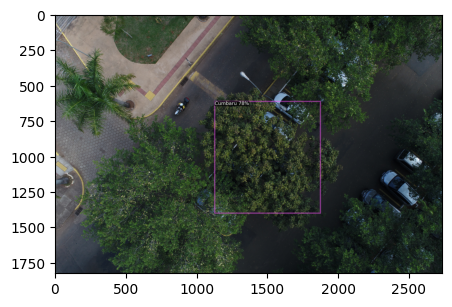

In [ ]:
image_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/31_08__18_DJI_0107.JPG"
on_image(image_path, predictor)

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("cumbaru_val2", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "cumbaru_val2")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[07/04 13:45:15 d2.data.datasets.coco]: Loaded 79 images in COCO format from /content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/val.json
[07/04 13:45:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/04 13:45:15 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/04 13:45:15 d2.data.common]: Serializing 79 elements to byte tensors and concatenating them all ...
[07/04 13:45:15 d2.data.common]: Serialized dataset takes 0.03 MiB
[07/04 13:45:15 d2.evaluation.evaluator]: Start inference on 79 batches
[07/04 13:45:31 d2.evaluation.evaluator]: Inference done 11/79. Dataloading: 1.2058 s/iter. Inference: 0.1636 s/iter. Eval: 0.0003 s/iter. Total: 1.3697 s/iter. ETA=0:01:33
[07/04 13:45:37 d2.evaluation.evaluator]: Inference done 16/79. Dataloading: 1.1646 s/iter. Inference: 0.1461 s/iter. Eval: 0.0003 

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!zip -r '/content/drive/MyDrive/cumbaru_faster_rcnn_detectron2_predict.zip' '/content/output'

updating: content/output/ (stored 0%)
updating: content/output/instances_predictions.pth (deflated 56%)
updating: content/output/coco_instances_results.json (deflated 70%)


In [ ]:
!zip -r '/content/drive/MyDrive/cumbaru_faster_rcnn_detectron2_predict2.zip' '/content/object_detection'

updating: content/object_detection/ (stored 0%)
updating: content/object_detection/metrics.json (deflated 78%)
updating: content/object_detection/last_checkpoint (stored 0%)
updating: content/object_detection/model_final.pth (deflated 7%)
  adding: content/object_detection/events.out.tfevents.1688475623.a2f9bcd37efc.1709.0 (deflated 72%)


In [ ]:
from detectron2.engine import DefaultPredictor
cfg_save_path = "IS_cfg.pickle"

with open(cfg_save_path, "rb") as f:
    cfg = pickle.load(f)

In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# Create a predictor using the trained model
#cfg = pickle.load(f)  # Load the configuration file used for training
predictor = DefaultPredictor(cfg)

# Create the evaluator
evaluator = COCOEvaluator('cumbaru_val2', cfg, False, output_dir="./output")

# Create the data loader for evaluation
data_loader = build_detection_test_loader(cfg, 'cumbaru_val2')

# Run inference on the dataset
results = inference_on_dataset(predictor.model, data_loader, evaluator)

# Get the recall from the evaluation results
recall = results["bbox"]["AP"]

print("Recall:", recall)


[07/04 13:47:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


WARNING [07/04 13:47:39 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/04 13:47:39 d2.data.datasets.coco]: Loaded 79 images in COCO format from /content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/val.json
[07/04 13:47:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/04 13:47:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/04 13:47:39 d2.data.common]: Serializing 79 elements to byte tensors and concatenating them all ...
[07/04 13:47:39 d2.data.common]: Serialized dataset takes 0.03 MiB
[07/04 13:47:39 d2.evaluation.evaluator]: Start inference on 79 batches
[07/04 13:47:56 d2.evaluation.evaluator]: Inference done 11/79. Dataloading: 1.1623 s/iter. Inference: 0.1809 s/iter. Eval: 0.0008 s/i

In [ ]:
from detectron2.engine import DefaultPredictor
cfg_save_path = "IS_cfg.pickle"

with open(cfg_save_path, "rb") as f:
    cfg = pickle.load(f)

In [ ]:
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# Create a predictor using the trained model
#cfg = ...  # Load the configuration file used for training
predictor = DefaultPredictor(cfg)

# Create the evaluator
evaluator = COCOEvaluator('cumbaru_val2', cfg, False, output_dir="./output")

# Evaluate the model on the dataset
trainer = DefaultTrainer(cfg)
val_loader = trainer.build_test_loader(cfg, 'cumbaru_val2')
inference_on_dataset(trainer.model, val_loader, evaluator)

# Get the mAR from the evaluation results
metrics = evaluator.evaluate()
mAR = metrics["bbox"]["AR"]

print("mAR:", mAR)


[07/04 13:49:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


WARNING [07/04 13:49:27 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/04 13:49:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
 

AssertionError: ignored